## Analyzing A Stroke Datasets

This analysis examines stroke datasets to uncover significant patterns and risk factors associated with stroke occurrence. We will also develop and evaluate predictive models to accurately identify patients at risk of having a stroke based on various health and demographic features. This comprehensive approach aims to provide valuable insights for early detection and prevention strategies in healthcare

## Libraries and Data

In [117]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [118]:
import warnings

In [119]:
df = pd.read_csv('stroke_data.csv')
df[:5]

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


## Data Cleaning

In [120]:
df.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [121]:
df = df.dropna()

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40907 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40907 non-null  float64
 2   hypertension       40907 non-null  int64  
 3   heart_disease      40907 non-null  int64  
 4   ever_married       40907 non-null  int64  
 5   work_type          40907 non-null  int64  
 6   Residence_type     40907 non-null  int64  
 7   avg_glucose_level  40907 non-null  float64
 8   bmi                40907 non-null  float64
 9   smoking_status     40907 non-null  int64  
 10  stroke             40907 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.7 MB


## What is the distribution of strokes by sex?

* How many males versus females have had a stroke?

In [123]:
# Group by 'sex' and sum the 'stroke' column to get the number of strokes by sex
stroke_by_sex = df.groupby('sex')['stroke'].sum()

# Display the result
print(stroke_by_sex)


# Group by 'sex' and count the number of occurrences of each combination of sex and stroke
stroke_by_sex_count = df.groupby(['sex', 'stroke']).size().unstack(fill_value=0)

# Calculate the percentage of strokes within each sex
stroke_by_sex_percentage = stroke_by_sex_count.div(stroke_by_sex_count.sum(axis=1), axis=0) * 100

# Display the result
print(stroke_by_sex_percentage)

sex
0.0    10230
1.0    10230
Name: stroke, dtype: int64
stroke          0          1
sex                         
0.0     43.781942  56.218058
1.0     54.953765  45.046235


## How does age relate to the occurrence of strokes?

* What is the average age of individuals who have had a stroke compared to those who haven't?

In [124]:
# Calculate the average age of individuals who have had a stroke
average_age_stroke = df[df['stroke'] == 1]['age'].mean()

# Calculate the average age of individuals who have not had a stroke
average_age_no_stroke = df[df['stroke'] == 0]['age'].mean()

# Display the results
print(f'Average age of stroke patients: {average_age_stroke}')
print(f'Average age of non-stroke patients: {average_age_no_stroke}')


Average age of stroke patients: 52.59266862170088
Average age of non-stroke patients: 50.061133662639996


## Is there a correlation between hypertension and strokes?

* What proportion of individuals with hypertension have experienced a stroke compared to those without hypertension?

In [125]:
# Group by 'hypertension' and calculate the mean of 'stroke' to get the proportion of strokes in each group
stroke_by_hypertension = df.groupby('hypertension')['stroke'].mean()

# Display the result
print(stroke_by_hypertension)

hypertension
0    0.433098
1    0.746685
Name: stroke, dtype: float64


## What is the impact of heart disease on the likelihood of having a stroke?

* What percentage of individuals with heart disease have had a stroke?

heart_disease
0    0.457317
1    0.792727
Name: stroke, dtype: float64


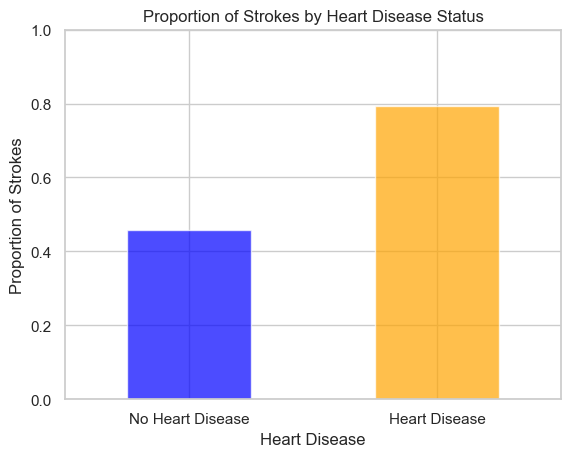

In [126]:
# Group by 'heart_disease' and calculate the mean of 'stroke' to get the proportion of strokes in each group
stroke_by_heart_disease = df.groupby('heart_disease')['stroke'].mean()

# Display the result
print(stroke_by_heart_disease)

# Visualization
# Set plot style
sns.set(style="whitegrid")
stroke_by_heart_disease.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Proportion of Strokes by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Proportion of Strokes')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'], rotation=0)
plt.ylim(0, 1)
plt.show()

## Does marital status affect the incidence of strokes?

* What percentage of married versus unmarried individuals have had a stroke?

ever_married
0    0.305377
1    0.542532
Name: stroke, dtype: float64


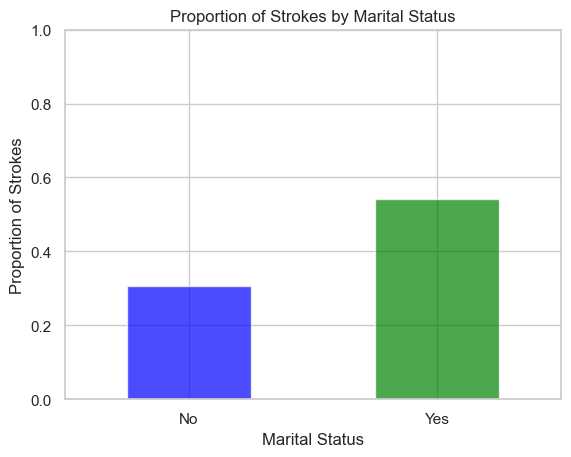

In [127]:
# Group by 'ever_married' and calculate the mean of 'stroke' to get the proportion of strokes in each group
stroke_by_marital_status = df.groupby('ever_married')['stroke'].mean()

# Display the result
print(stroke_by_marital_status)

# Visualization
# Set plot style
sns.set(style="whitegrid")
stroke_by_marital_status.plot(kind='bar', color=['blue', 'green'], alpha=0.7)
plt.title('Proportion of Strokes by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Strokes')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.ylim(0, 1)
plt.show()

## How does work type influence stroke occurrence?

* Which work types have the highest incidence of strokes?

work_type
0    0.000000
1    0.000000
2    0.449535
3    0.603941
4    0.483827
Name: stroke, dtype: float64


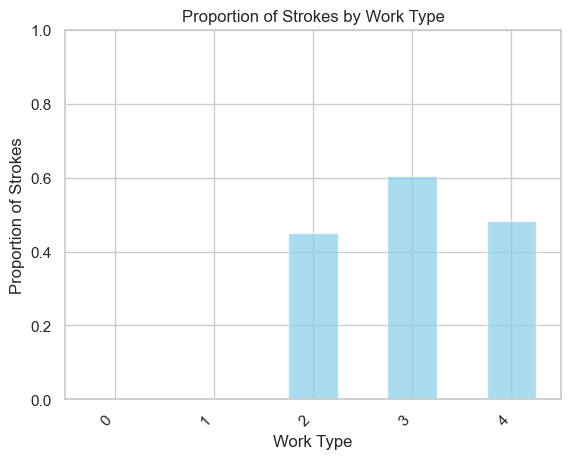

In [128]:
# Group by 'work_type' and calculate the mean of 'stroke' to get the proportion of strokes in each group
stroke_by_work_type = df.groupby('work_type')['stroke'].mean()

# Display the result
print(stroke_by_work_type)

# Visualization
# Set plot style
sns.set(style="whitegrid")
stroke_by_work_type.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Proportion of Strokes by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Proportion of Strokes')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()

## Is there a difference in stroke rates between urban and rural residents?

* Do urban residents experience more strokes than rural residents?

Residence_type
0    0.494105
1    0.505864
Name: stroke, dtype: float64


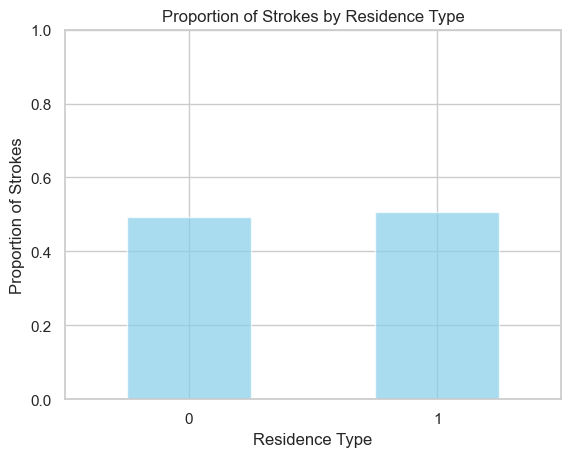

In [129]:
# Group by 'Residence_type' and calculate the mean of 'stroke' to get the proportion of strokes in each group
stroke_by_residence_type = df.groupby('Residence_type')['stroke'].mean()

# Display the result
print(stroke_by_residence_type)

# Visualization
# Set plot style
sns.set(style="whitegrid")
stroke_by_residence_type.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Proportion of Strokes by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Proportion of Strokes')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

## What is the relationship between average glucose levels and strokes?

* What is the average glucose level of individuals who have had a stroke compared to those who haven't?

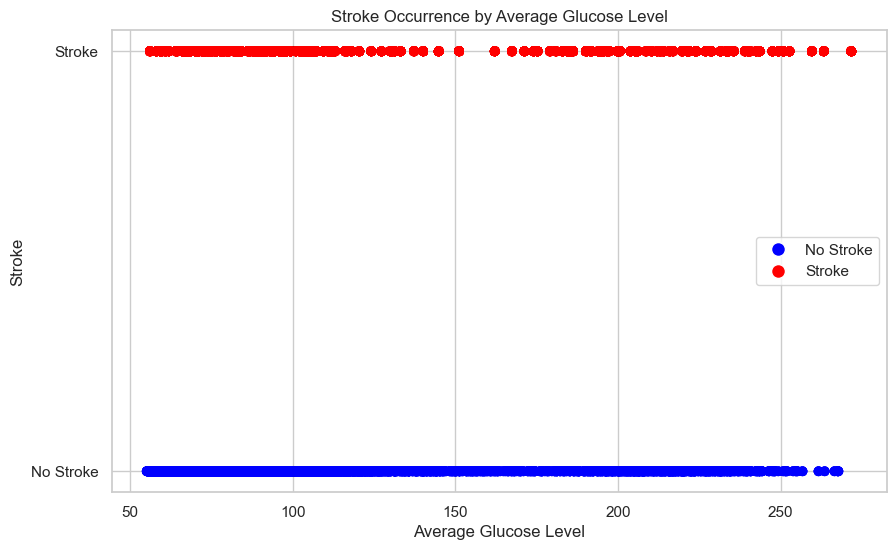

In [130]:
# Scatter plot of avg_glucose_level vs. stroke
plt.figure(figsize=(10, 6))
colors = {0: 'blue', 1: 'red'}

# Create scatter plot
plt.scatter(df['avg_glucose_level'], df['stroke'], c=df['stroke'].map(colors), alpha=0.7)
plt.title('Stroke Occurrence by Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Stroke')
plt.yticks([0, 1], ['No Stroke', 'Stroke'])
plt.grid(True)

# Add legend
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Stroke'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Stroke')])
plt.show()


## How does BMI affect stroke risk?

* What is the average BMI of individuals who have had a stroke compared to those who haven't?

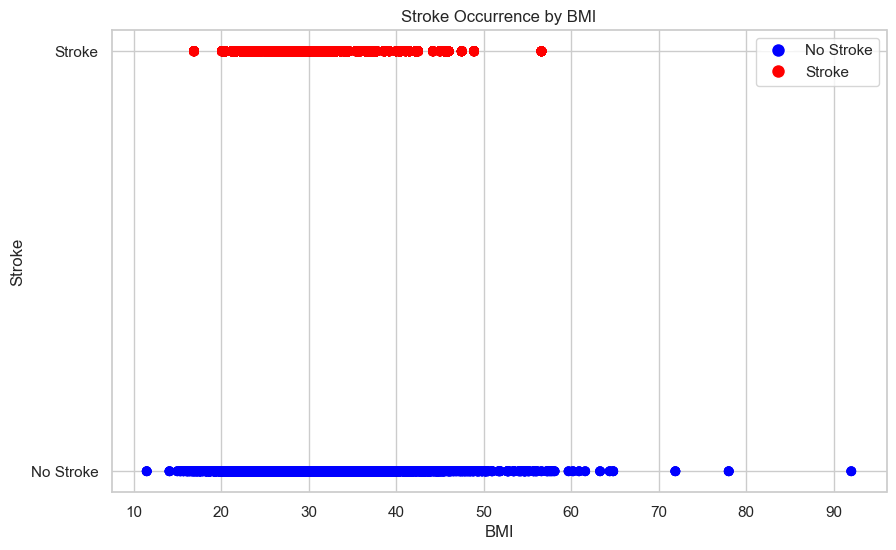

In [131]:
# Scatter plot of BMI vs. stroke
plt.figure(figsize=(10, 6))
colors = {0: 'blue', 1: 'red'}

# Create scatter plot
plt.scatter(df['bmi'], df['stroke'], c=df['stroke'].map(colors), alpha=0.7)
plt.title('Stroke Occurrence by BMI')
plt.xlabel('BMI')
plt.ylabel('Stroke')
plt.yticks([0, 1], ['No Stroke', 'Stroke'])
plt.grid(True)

# Add legend
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='No Stroke'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Stroke')])
plt.show()


## What is the influence of smoking status on stroke occurrence?

* What proportion of smokers have had a stroke compared to non-smokers?

smoking_status
0    0.466708
1    0.535175
Name: stroke, dtype: float64


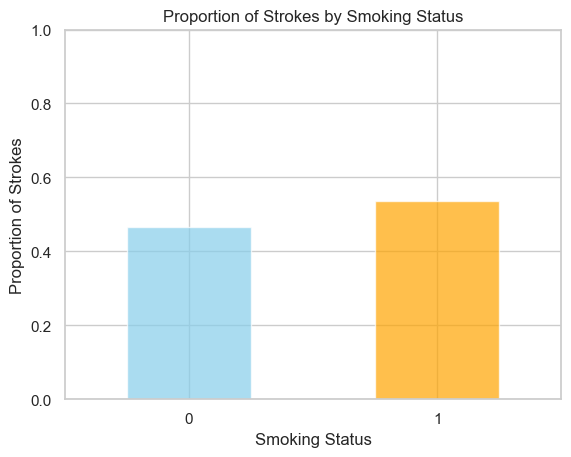

In [132]:
# Group by 'smoking_status' and calculate the mean of 'stroke' to get the proportion of strokes in each group
stroke_by_smoking_status = df.groupby('smoking_status')['stroke'].mean()

# Display the result
print(stroke_by_smoking_status)

# Set plot style
sns.set(style="whitegrid")
# Visualization
stroke_by_smoking_status.plot(kind='bar', color=['skyblue', 'orange'], alpha=0.7)
plt.title('Proportion of Strokes by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Proportion of Strokes')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.show()

## Logistic Regression
**Now lets do train test split so that we can train our model**

### Training and Testing Data
**Now that we have explored the data a bit, lets go ahead and split the data into training and testing sets**

In [134]:
# Prepare X by Setting a Variable X to equal to the Numerical features of the customer except stroke column
X = df.drop(['stroke'], axis=1)

# y Variable equal to 'stroke'
y = df['stroke']

**Importing sklearn so that we can use model_selection.train_test_split to split the data into training and testing**

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training the Model
**Now lets train our model on our training data**

#### Importing LogisticRegression from sklearn.linear_model

In [136]:
from sklearn.linear_model import LogisticRegression

****create an Instance of a LogisticRegression() model****

In [137]:
lm = LogisticRegression()

****Fit lm on the training data****

In [138]:
warnings.filterwarnings('ignore')
lm.fit(X_train, y_train)

LogisticRegression()

### Predictions and Evaluation Test Data
Now lets predict values for testing data

In [139]:
predictions = lm.predict(X_test)

### Classification report
Now lets create a classification report for the model

In [143]:
#importing sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix

In [141]:
cf_re = classification_report(y_test, predictions)
print(cf_re)

              precision    recall  f1-score   support

           0       0.65      0.76      0.70      6054
           1       0.72      0.61      0.66      6219

    accuracy                           0.68     12273
   macro avg       0.69      0.68      0.68     12273
weighted avg       0.69      0.68      0.68     12273



**Insights:**

The model's performance is decent with an accuracy of 68%, indicating that it can correctly classify patients as having or not having a stroke about two-thirds of the time.
However, the recall for patients with a stroke (class 1) is relatively lower at 0.61, indicating that the model may miss identifying some patients who actually had a stroke. This could be concerning in a medical context where identifying strokes accurately is crucial for timely treatment.
The precision for patients with a stroke (class 1) is higher at 0.72, indicating that when the model predicts a stroke, it's correct most of the time. However, this precision comes at the cost of lower recall, meaning some stroke cases might be missed.
Improving the recall for stroke cases could be a priority, possibly by fine-tuning the model or using additional features that are more indicative of strokes.

In summary, while the model shows decent overall performance, especially in terms of precision for stroke cases, there is room for improvement, particularly in recall for identifying stroke cases more accurately

## Random Forest classifier
**Now lets create an instance of the RandomForestClassifier class and fit it to our training data to see which one 
will do better between Logistic Regression and Random Forest**

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
rfc = RandomForestClassifier(n_estimators=300)

In [146]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

### Predictions and Evaluations of Random Forest Classifier

**Creating prediction from the test set and create a classification report and confusion matrix**

In [147]:
rfc_pred = rfc.predict(X_test)

**Showing the classification report**

In [148]:
cl_re_rfc = classification_report(y_test, rfc_pred)
print(cl_re_rfc )

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6054
           1       0.99      1.00      1.00      6219

    accuracy                           1.00     12273
   macro avg       1.00      1.00      1.00     12273
weighted avg       1.00      1.00      1.00     12273



**Showing the confusion matrix**

In [149]:
co_mtx_rfc  = confusion_matrix(y_test, rfc_pred)
print(co_mtx_rfc)

[[6015   39]
 [   0 6219]]


Insights:

The Random Forest Classifier has achieved perfect accuracy and near-perfect precision and recall rates for both classes, indicating an exceptional performance in classifying patients as having or not having a stroke.
This high level of performance is quite rare and impressive, suggesting that the features used by the model are highly informative and discriminatory for distinguishing between stroke and non-stroke cases.
The model's ability to correctly identify stroke cases (class 1) with such high precision and recall is especially valuable in a medical context where accuracy is critical for patient care and treatment decisions.


In summary, the Random Forest Classifier has demonstrated outstanding performance in predicting strokes, with perfect or near-perfect precision, recall, and accuracy rates across both classes. This suggests that the model is highly reliable and effective in identifying patients who have had a stroke.